<a href="https://colab.research.google.com/github/vg0303/ML_GirlScript/blob/main/LR_Univariate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Univariate Linear Regression

Date: 13/06/21

[Link to the dataset used](https://archive.ics.uci.edu/ml/datasets/Student+Performance)

We are basically predicting G3 based on the value of G1, and splitting the available data in 80-20 proportion for training and testing 

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd '/content/drive/MyDrive/ML_Colab/Linear_Regression/student' 

/content/drive/MyDrive/ML_Colab/Linear_Regression/student


In [3]:
ls

cleanedMathData.csv  student-merge.R  univariate_MathData_2.csv
student-mat.csv      student-por.csv
student-mat.xlsx     student.txt


In [4]:
import pandas as pd #working with csv or excel files
import numpy as np #working with numbers/ arrays/ tensors
import tensorflow as tf # framework for building the model
from tensorflow import keras #API / library 
import os #using os commands between the python language

In [5]:
mathData = pd.read_csv('student-mat.csv', sep=';') #load the csv file as dataframe

In [6]:
mathData.head(10) #print the first ten rows of the dataframe

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10
5,GP,M,16,U,LE3,T,4,3,services,other,reputation,mother,1,2,0,no,yes,yes,yes,yes,yes,yes,no,5,4,2,1,2,5,10,15,15,15
6,GP,M,16,U,LE3,T,2,2,other,other,home,mother,1,2,0,no,no,no,no,yes,yes,yes,no,4,4,4,1,1,3,0,12,12,11
7,GP,F,17,U,GT3,A,4,4,other,teacher,home,mother,2,2,0,yes,yes,no,no,yes,yes,no,no,4,1,4,1,1,1,6,6,5,6
8,GP,M,15,U,LE3,A,3,2,services,other,home,mother,1,2,0,no,yes,yes,no,yes,yes,yes,no,4,2,2,1,1,1,0,16,18,19
9,GP,M,15,U,GT3,T,3,4,other,other,home,mother,1,2,0,no,yes,yes,yes,yes,yes,yes,no,5,5,1,1,1,5,0,14,15,15


We are just going to consider the columns G1 and G3 for univariate linear regression

$G3_i= G1_i \times\theta_1+\theta_0$


In [7]:
uniMathData = mathData[['G1', 'G3']]
uniMathData.head(5)

,G1,G3
0,5,6
1,5,6
2,7,10
3,15,15
4,6,10


In [8]:
uniMathData.to_csv('univariate_MathData_2.csv')

In [9]:
ls

cleanedMathData.csv  student-merge.R  univariate_MathData_2.csv
student-mat.csv      student-por.csv
student-mat.xlsx     student.txt


#Data Visualization

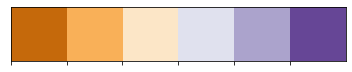

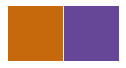

In [10]:
import seaborn as sns
sns.palplot(sns.color_palette('PuOr')) #Purple to Orange colors
pal = sns.color_palette('PuOr', 6) #print 6 color shades from Purple to Orange
pal.as_hex() #set hex code values for colors

import matplotlib.pyplot as plt
plt.style.use(['seaborn'])
sns_colors = ['#c6690c', '#664697'] #orange Purple hex codes
sns.set_palette(sns_colors) #set the palette as sns_colors 
sns.palplot(sns.color_palette(sns_colors)) #plot the color codes

In [11]:

uniMathData.columns #columns in the dataframe

Index(['G1', 'G3'], dtype='object')

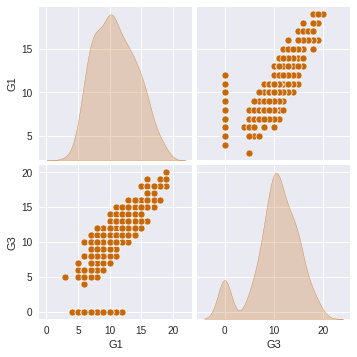

In [12]:
#pairplot for all the values

sns.pairplot(uniMathData,
             x_vars = ['G1', 'G3'],
             y_vars =  ['G1', 'G3'],
       diag_kind='kde'
             )

As the points kind of all lie on a line, we can see that using Linear Regression would be best option.

#Data Split

We will be spliting the data in 80-20 format

In [13]:
#80-20 train-test percent split

trainDataset = uniMathData.sample(frac=0.8, random_state=0) 
testDataset = uniMathData.drop(trainDataset.index)

print(trainDataset.head())
print(testDataset.head())

     G1  G3
329  14  14
318  11  10
317   9   9
65   16  15
59   15  16
    G1  G3
9   14  15
25   6   8
28  11  11
31  17  17
32  17  16


In [14]:
print(trainDataset.shape)
print(testDataset.shape)

#(rows, columns)

(316, 2)
(79, 2)


In [15]:
#copy the trainDataset dataframe for getting the features

trainFeatures = trainDataset.copy()
testFeatures = testDataset.copy()

print(trainFeatures.head())
print(testFeatures.head())

     G1  G3
329  14  14
318  11  10
317   9   9
65   16  15
59   15  16
    G1  G3
9   14  15
25   6   8
28  11  11
31  17  17
32  17  16


In [16]:
#removing the G3 column and saving it into the labels variable as we want to predict the value of G3 based on value of G1.

trainLabels = trainFeatures.pop('G3')
testLabels = testFeatures.pop('G3')

print(trainLabels.head())
print(testLabels.head())

329    14
318    10
317     9
65     15
59     16
Name: G3, dtype: int64
9     15
25     8
28    11
31    17
32    16
Name: G3, dtype: int64


In [17]:
print(trainFeatures.head())
print(testFeatures.head())

     G1
329  14
318  11
317   9
65   16
59   15
    G1
9   14
25   6
28  11
31  17
32  17


**Why use neuron? or a neural network?**

We will now create a Sequential Model and add a neuron beacuse neurons are very adjustable, you can adjust them as per what is best. They will get auto-adjusted.

It will follow the best line or the best model for the data, which might not be the linear regression line, hence we use Neurons.

In [18]:
# univariate -> num(features) = 1
# multvariate -> num(features) > 1 = 11
#perception model
#sequential here implies that the sequence/flow of network will be maintained at all times
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(1)

])

In [19]:
model.compile(
    loss = 'mean_absolute_error', #minimizing the MAE loss
    optimizer = tf.keras.optimizers.Adam(0.001), #learning rate specified as 0.001
    # optimizer = 'adam', #takes the default learning rate
    metrics = ['mae', 'mse'] #meanSquare and meanAbsolute error metrics
)

#out of 'mse' and 'mae' the model will take 'mae' as the "loss" because thats what is mentioned in the first line [loss='mean_absolute_error']

In [20]:
#training the data for 300 times
numEpochs = 300
history = model.fit(x = trainFeatures, y = trainLabels, validation_data = (testFeatures, testLabels), epochs = numEpochs)

#val_loss denotes the diff b/w the actual label and the predicted value

Epoch 1/300
10/10 [==============================] - 1s 21ms/step - loss: 23.9866 - mae: 23.9866 - mse: 643.4528 - val_loss: 25.3632 - val_mae: 25.3632 - val_mse: 717.0375
Epoch 2/300
10/10 [==============================] - 0s 3ms/step - loss: 23.8692 - mae: 23.8692 - mse: 637.3048 - val_loss: 25.2386 - val_mae: 25.2386 - val_mse: 710.1676
Epoch 3/300
10/10 [==============================] - 0s 3ms/step - loss: 23.7515 - mae: 23.7515 - mse: 631.2021 - val_loss: 25.1141 - val_mae: 25.1141 - val_mse: 703.3409
Epoch 4/300
10/10 [==============================] - 0s 5ms/step - loss: 23.6339 - mae: 23.6339 - mse: 625.1179 - val_loss: 24.9896 - val_mae: 24.9896 - val_mse: 696.5413
Epoch 5/300
10/10 [==============================] - 0s 3ms/step - loss: 23.5164 - mae: 23.5164 - mse: 619.0902 - val_loss: 24.8652 - val_mae: 24.8652 - val_mse: 689.7825
Epoch 6/300
10/10 [==============================] - 0s 4ms/step - loss: 23.3988 - mae: 23.3988 - mse: 613.0352 - val_loss: 24.7407 - val_mae: 2

some analysis of the above data:

the val_loss has reduced from 4.4903 to 1.5950 after 300 training rounds.

the alpha that we provided was 0.001, as it was a small value the change is not that drastic, because **alpha denotes the learning rate**.

In [21]:
model.summary()
#gives us the details of the model

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


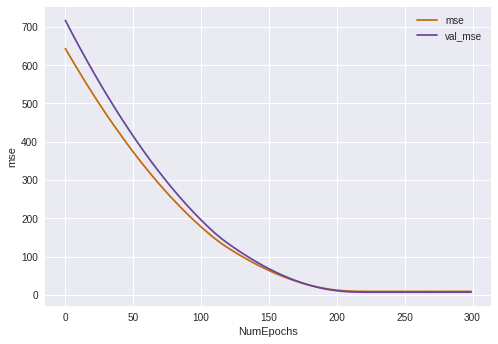

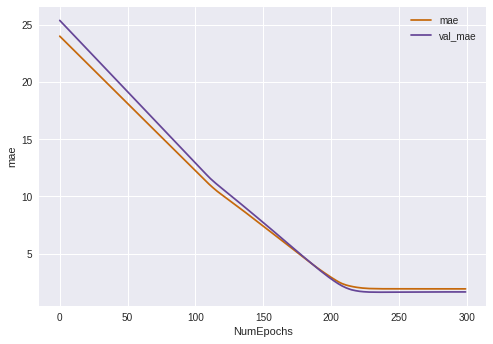

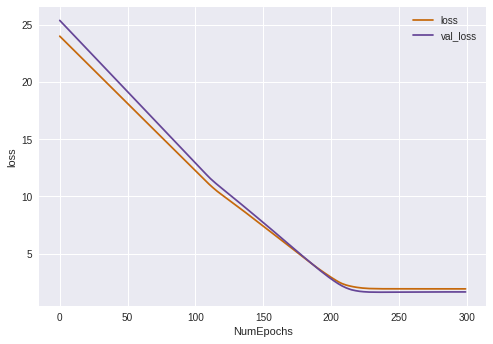

In [22]:
# tempString = 'mse'
# define a function to plot the graph
# import mathplotlib.pyplot as plt

def curvePlots(tempString):
  plt.plot(history.history[tempString])             # plot the "history" derived above, in it plot each row of the 300 rows, and in that row plot "tempstring" which will be the parameter
  plt.plot(history.history[f'val_{tempString}'])    # suppose "tempstring" is 'loss', the plot 'val_loss' as well
  plt.xlabel('NumEpochs')                           # x axis has 'numepoch'
  plt.ylabel(tempString)                            # y axis will have the 'tempstring'
  plt.legend([tempString, f'val_{tempString}'])     # used to denote which line is 'tempstring' and which is 'val + tempstring'
  plt.show()                                        #used to show the graph


curvePlots('mse')
curvePlots('mae')
curvePlots('loss')

The above graphs are for the training set of value, between the number of time the model was trained and various kinds of loss given as parameters. 

In [35]:
model.predict([9])

# the actual value corresponding to the input = 9 is 9. Through this model the predicted value is coming out to be 9.4, not accurate but pretty close

array([[9.498631]], dtype=float32)

In [24]:
# testPreds = model.predict(testFeatures).flatten() #array of all prediction values

#for single values

print(f'Prediction for input value 1: {model.predict([1])}')


# for a list of values
tempListforPreds = [1,2,3,4,5]
print(f'''

input List = {tempListforPreds}


List of Predictions:
{model.predict(tempListforPreds)}

List of Predictions (flattened out):
{model.predict(tempListforPreds).flatten()}
''')

Prediction for input value 1: [[2.8220177]]


input List = [1, 2, 3, 4, 5]


List of Predictions:
[[2.8220177]
 [3.6565943]
 [4.491171 ]
 [5.3257475]
 [6.1603236]]

List of Predictions (flattened out):
[2.8220177 3.6565943 4.491171  5.3257475 6.1603236]



In [25]:
print(testFeatures)

     G1
9    14
25    6
28   11
31   17
32   17
..   ..
365  10
367   7
379  10
381   7
393  11

[79 rows x 1 columns]


In [28]:
# at the end we need to find the predictions for the test data which is stored in testFeatures, the test labels are in testLabels.

testPreds = model.predict(testFeatures).flatten() #array of all prediction values
print(len(testPreds))
print(testPreds)

79
[13.671513  6.9949   11.167783 16.175243 16.175243 12.002359 13.671513
 17.844395 17.844395  8.664053 13.671513 12.836936  8.664053  7.829477
  9.498631 12.836936 11.167783 15.340666  7.829477 10.333206 14.506089
 12.836936 13.671513 15.340666  7.829477  7.829477  8.664053 10.333206
 12.002359 10.333206 12.002359 12.836936 10.333206  6.9949    9.498631
 12.002359  7.829477  8.664053 13.671513  9.498631  9.498631  7.829477
 12.002359  6.9949   12.836936  7.829477  7.829477 11.167783 12.836936
 16.175243 12.002359 14.506089  9.498631 12.002359 14.506089 12.002359
 14.506089 12.002359 14.506089 11.167783 12.002359  8.664053 15.340666
  7.829477 15.340666 11.167783 15.340666 12.836936  8.664053  8.664053
 12.002359 17.009819 12.836936 15.340666 10.333206  7.829477 10.333206
  7.829477 11.167783]


In [39]:
#number of unique values predicted
print(len(np.unique(testPreds)))

14


In [42]:
print(len(testLabels.unique()))

16


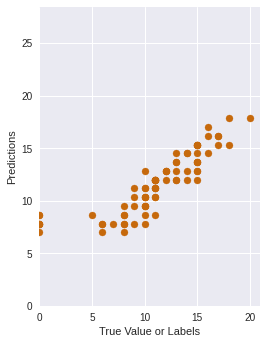

In [29]:
# prediciton plot --> how well is your model predicting across the actual labels
# plot the graph b/w the predicted values (testPreds) for the i/p values and the actual o/p (testLabels) that should be produced.

def predPlot(labels, predictions):
  plt.scatter(labels, predictions)   #The scatter() function plots one dot for each observation. It needs two arrays of the same length for x and y axis.
  plt.ylabel('Predictions')
  plt.xlabel('True Value or Labels')
  plt.axis('equal')                  #makes sure that the scaling is same on both the axis
  plt.axis('square')                 #it creates a square plot where the ranges for both axes occupy are equal to the length in plot. The range of axes in this solution are selected automatically
  plt.xlim([0, plt.xlim()[1]])       #is used to get or set the x-limits of the current axes
  plt.ylim([0, plt.ylim()[1]])
  plt.show()

predPlot(testLabels, testPreds)

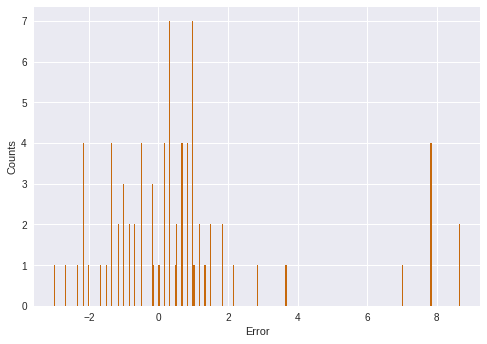

In [30]:

#error plot --> gaussian distribution 

def errorPlot(preds, labels, counts):
  errors = preds - labels
  plt.hist(errors, counts)
  plt.xlabel('Error')
  plt.ylabel('Counts')
  plt.show()

errorPlot(testPreds, testLabels, numEpochs)

**Note**:

Validation loss val_loss is a metric that tells you how much deviation from the actual label can you expect in the predicted label

To optimize your predicitons -->

Hyperparameter tuning --> numEpochs, optimizer, learning_rate, lossFunctions